#Entrega proyecto final, Data Science 2, Comisión #61175
**Juan Moreno**


#Presentación de la base de datos: "120 years of Olympic History"
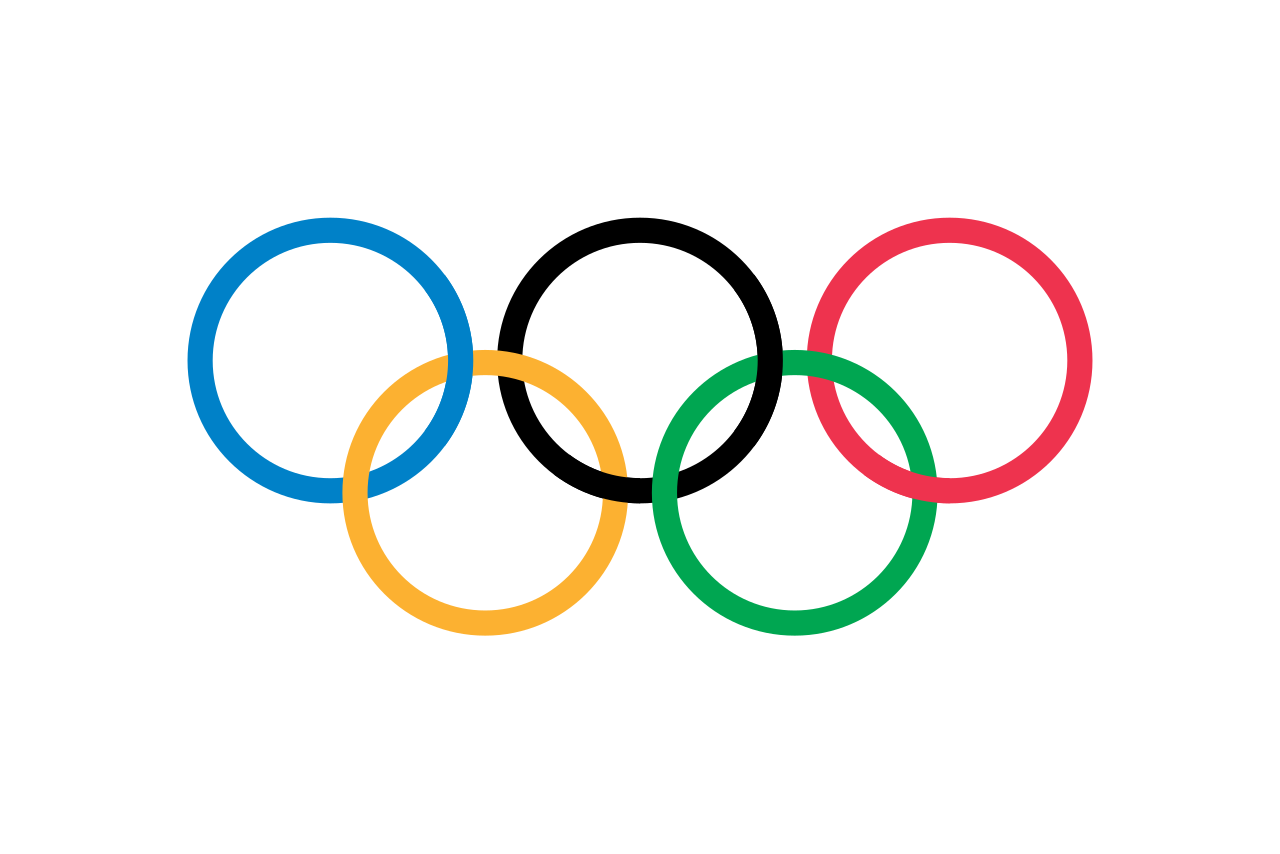

Fuente:https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

El dataset elegido desglosa la participación de atletas en disciplinas a lo largo de los años. Se listan las columnas de cada atleta:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA


Este conjunto de datos abarca 120 años de historia olímpica, documentando la participación de cada atleta en los Juegos Olímpicos. Cada registro contiene información detallada sobre el atleta, incluyendo un identificador único, nombre, sexo, edad, altura, peso, equipo, y el código del Comité Olímpico Nacional (NOC). Adicionalmente, se incluyen datos sobre los Juegos específicos en los que participó, como el año, la temporada (verano o invierno), la ciudad anfitriona, el deporte y el evento en el que compitió, y las medallas obtenidas (oro, plata, bronce o ninguna).

El identificador único asegura que cada atleta pueda ser diferenciado de los demás, permitiendo análisis precisos y el seguimiento de su desempeño a lo largo del tiempo. Los nombres de los atletas, junto con su sexo, edad, altura y peso, proporcionan un perfil físico y demográfico que es crucial para estudios sobre el impacto de estas variables en el rendimiento deportivo.

Los datos del equipo y el NOC facilitan el análisis de la representación nacional en los Juegos Olímpicos, permitiendo observar tendencias en la participación y éxito de diferentes países. La información sobre el equipo también puede ser utilizada para estudiar la colaboración y dinámica de grupo dentro de los deportes de equipo.

La información sobre los Juegos Olímpicos, que incluye el año, la temporada y la ciudad anfitriona, proporciona un contexto histórico y geográfico. Esto permite analizar cómo factores como la localización y la época del año pueden influir en el desempeño de los atletas. La distinción entre las temporadas de verano e invierno es particularmente relevante para estudios comparativos entre diferentes tipos de deportes y condiciones climáticas.

El deporte y el evento especifican la disciplina en la que el atleta compitió, lo cual es fundamental para análisis específicos de cada deporte. La diversidad de deportes y eventos cubiertos en el conjunto de datos permite una amplia gama de estudios sobre tendencias y evolución en el ámbito deportivo olímpico.

Finalmente, la información sobre las medallas obtenidas proporciona una medida directa del éxito y logro de los atletas, permitiendo análisis sobre los factores que contribuyen al éxito en los Juegos Olímpicos. Esto puede incluir estudios sobre la relación entre características físicas y el rendimiento, la efectividad de programas de entrenamiento de diferentes países, y la evolución del rendimiento deportivo a lo largo del tiempo.

En resumen, este conjunto de datos ofrece una rica fuente de información para el análisis de la historia olímpica y el rendimiento deportivo. Permite explorar una variedad de temas, desde tendencias demográficas y geográficas hasta factores específicos de cada deporte que contribuyen al éxito olímpico. Con datos que abarcan más de un siglo, es posible identificar patrones y cambios significativos en el deporte olímpico, proporcionando valiosos insights tanto para investigadores como para entusiastas del deporte. La gran cantidad de variables incluidas facilita un análisis detallado y multifacético del mundo de los Juegos Olímpicos, haciendo de este conjunto de datos una herramienta indispensable para el estudio del deporte y la historia olímpica.

#HIPÓTESIS

"La proporción de medallistas femeninas ha cambiado significativamente a lo largo del tiempo"


#PRIMERA PARTE: Pre-entrega - Visualización de datos


##Lectura y depuración de base de datos

Importo bibliotecas que voy a usar y me ubico en la carpeta de la base de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Biblioteca de gráficos
import seaborn as sns

!wget 'https://github.com/jamorenoo/datascience2/raw/main/entregaFinal_olimpiadas/athlete_events.zip'
!unzip athlete_events.zip -d content # Unzip to 'content' directory

--2024-12-03 22:58:19--  https://github.com/jamorenoo/datascience2/raw/main/entregaFinal_olimpiadas/athlete_events.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jamorenoo/datascience2/main/entregaFinal_olimpiadas/athlete_events.zip [following]
--2024-12-03 22:58:19--  https://raw.githubusercontent.com/jamorenoo/datascience2/main/entregaFinal_olimpiadas/athlete_events.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5534973 (5.3M) [application/zip]
Saving to: ‘athlete_events.zip’

athlete_events.zip  100%[===================>]   5.28M  --.-KB/s    in 0.09s   

2024-12-03 22:58:19 (60.3 M

Abro el dataset e inspecciono columnas, tipo de datos, filas, etc.

In [2]:
ath = pd.read_csv('content/athlete_events.csv')
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [4]:
#Miro las primeras 5 filas del dataset
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


###Duplicados
Se estudian los datos duplicados de la base de datos

In [5]:
ath.duplicated(keep=False).sum()

1997

Encuentro que hay duplicados y los expongo en un nuevo dataframe

In [6]:
duplicados = ath.duplicated(keep=	False)
ath_duplicados = ath[duplicados]
ath_duplicados

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1251,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4281,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269998,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
270199,135173,Henri Achille Zo,M,58.0,NaN,NaN,France,FRA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


Noto que hay mas de un duplicado, identifico cuántos hay

In [7]:
#Cantidad de valores duplicados únicos que hay
ath_duplicados_unicos=pd.DataFrame(ath_duplicados.drop_duplicates(keep='first'))
ath_duplicados_unicos

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1251,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4281,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4861,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4863,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
4866,2777,Hermann Reinhard Alker,M,51.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267928,134046,ngel Zrraga Argelles,M,41.0,NaN,NaN,Mexico,MEX,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269992,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269996,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269998,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


Obtengo 612 valores que se repiten, acumulando una suma de 1997 filas en el dataset.
Procedo a borrarlas

In [8]:
#Utilizo drop_duplicates para eliminar los duplicados en el dataset
ath.drop_duplicates(keep='first', inplace=True)
ath.shape

(269731, 15)

Verifico analíticamente
271116 - 269731 = 1385

Me da lo mismo que la suma de duplicados menos los valores únicos duplicados (1997 - 612 = 1385)

###Valores nulos
Se destacan columnas con números nulos y se procede a calcular la dimensión de estos para decidir de su paredero.

In [9]:
ath.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9315
Height,58814
Weight,61527
Team,0
NOC,0
Games,0
Year,0


Como son varias las columnas que tienen números nulos, calculo el peso de ellos para saber que puedo hacer.

In [10]:
# Obtengo la el peso de la cantidad de los números nulos para saber qué hacer con ellos

for i in range(len(ath.isnull().sum())):
  if ath.isnull().sum().iloc[i] > 0:
    result=ath.isnull().sum().iloc[i]/ath.shape[0]*100
    print(ath.columns[i], f"{result:.0f}", "%");

Age 3 %
Height 22 %
Weight 23 %
Medal 85 %


Los datos nulos de Edad, representa una cantidad insignificante que podemos obviar. Según lo visto en clase, si es menor al 10% de la cantidad total podríamos trabajar normalmente con esa información pero la diferencia se considerará cuando obtengamos las conclusiones.

Los datos nulos de medallas, si bien en una porción grande se justifica porque solo una pequeña porción de atletas recibe medallas. Podemos considerar esta columna con normalidad.

Para el caso de altura y peso, haremos el siguiente análisis para entender la distribución de valores nulos por deporte. Se grafica para cada caso, la cantidad de valores nulos y no nulos, por deporte. A su vez, se agrega en la parte de arriba de la columna, el porcentaje que representa la cantidad de valores nulos, sobre el total de los valores. Las columnas se ordenan de izquierda a derecha, según el porcentaje de forma descendente.

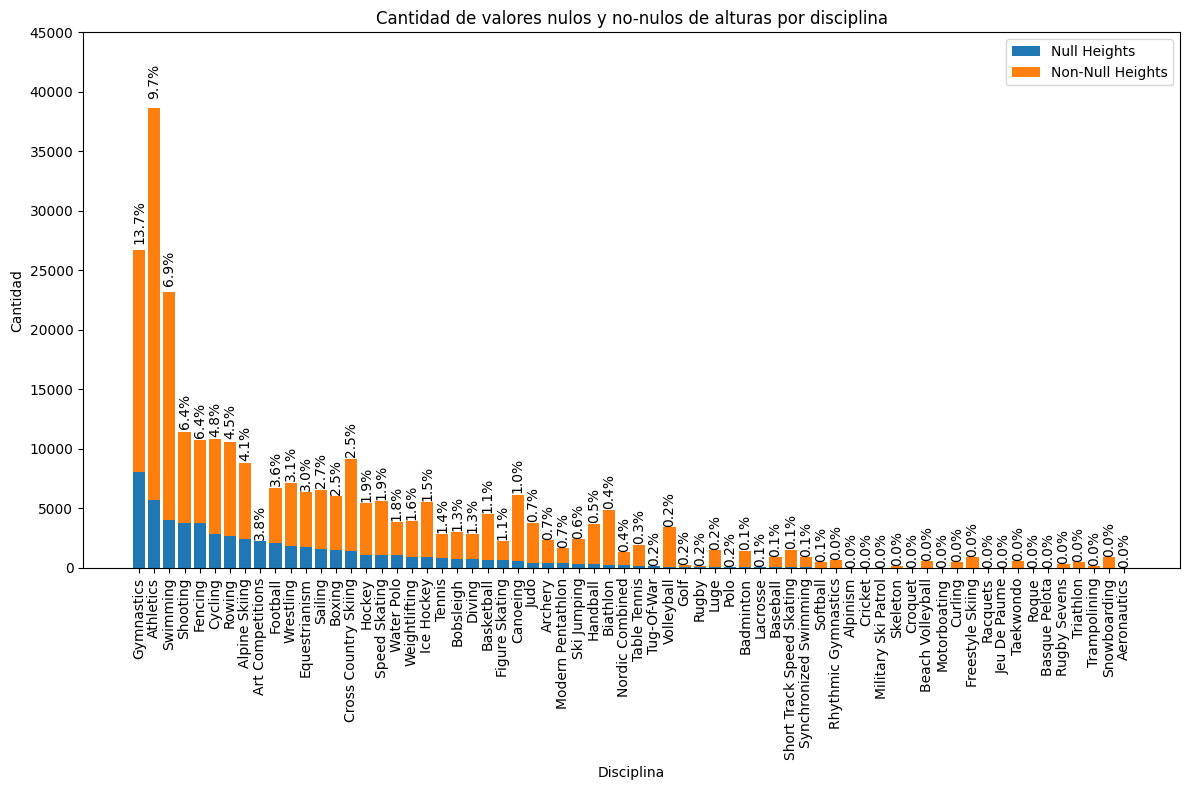

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

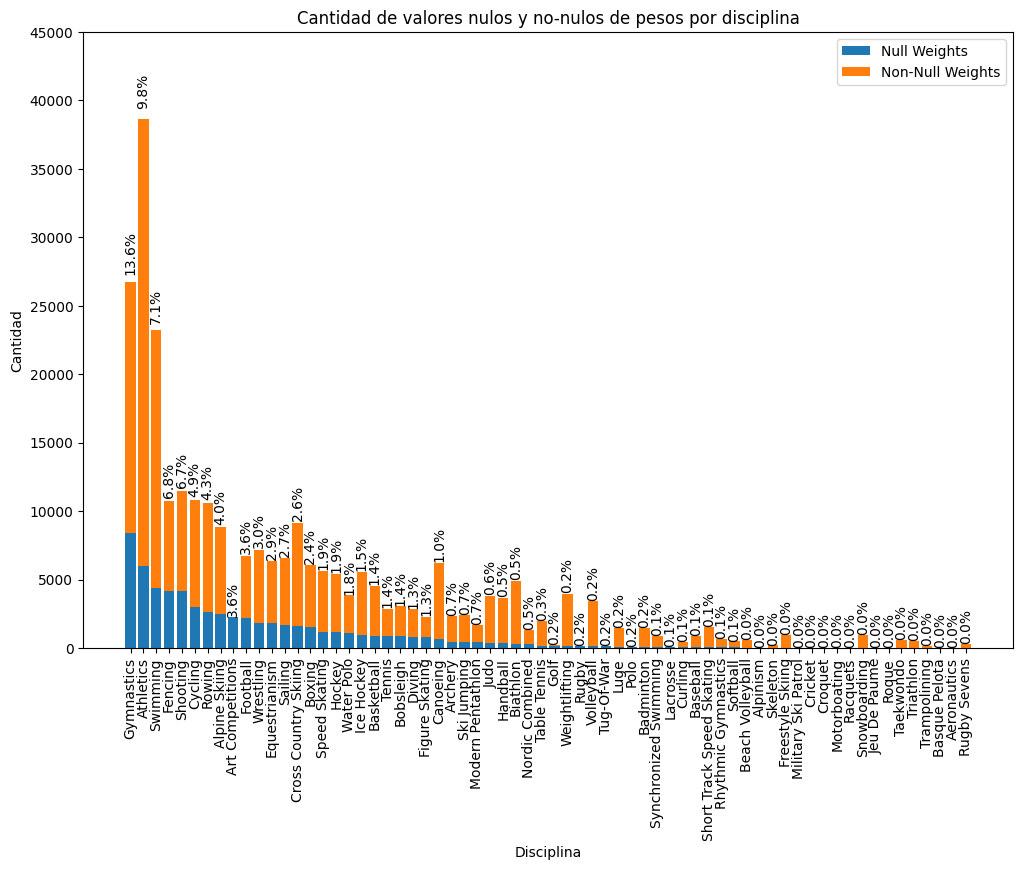

In [11]:
# Función para contar los valores nulos y no-nulos de todas las disciplina
def conteo_nulo_nonulo(df, column):
    disciplinas = df['Sport'].unique()
    conteo_nulo = df.groupby('Sport')[column].apply(lambda x: x.isnull().sum())
    conteo_nonulo = df.groupby('Sport')[column].apply(lambda x: x.notnull().sum())
    for sport in disciplinas:
        if sport not in conteo_nulo.index:
            conteo_nulo.loc[sport] = 0
        if sport not in conteo_nonulo.index:
            conteo_nonulo.loc[sport] = 0
    return conteo_nulo, conteo_nonulo

# Cuento los valores nulos para altura 'Height'
conteo_nulo_altura, conteo_nonulo_altura = conteo_nulo_nonulo(ath, 'Height')

# Cuento los valores nulos para peso 'Weight'
conteo_nulo_peso, conteo_nonulo_peso = conteo_nulo_nonulo(ath, 'Weight')

# Porcentaje relativo al total de cada columna
total_conteo_nulo_altura = conteo_nulo_altura.sum()
total_conteo_nulo_peso = conteo_nulo_peso.sum()

porcentaje_nulo_altura = (conteo_nulo_altura / total_conteo_nulo_altura) * 100
porcentaje_nulo_peso = (conteo_nulo_peso / total_conteo_nulo_peso) * 100

# Ordeno disciplinas por orden descendente de porcentaje para altura
disciplina_ordenada_poraltura = porcentaje_nulo_altura.sort_values(ascending=False).index
conteo_nulo_altura = conteo_nulo_altura.loc[disciplina_ordenada_poraltura]
conteo_nonulo_altura = conteo_nonulo_altura.loc[disciplina_ordenada_poraltura]
porcentaje_nulo_altura = porcentaje_nulo_altura.loc[disciplina_ordenada_poraltura]

# Ordeno disciplinas por orden descendente de porcentaje para peso
disciplina_ordenada_porpeso = porcentaje_nulo_peso.sort_values(ascending=False).index
conteo_nulo_peso = conteo_nulo_peso.loc[disciplina_ordenada_porpeso]
conteo_nonulo_peso = conteo_nonulo_peso.loc[disciplina_ordenada_porpeso]
porcentaje_nulo_peso = porcentaje_nulo_peso.loc[disciplina_ordenada_porpeso]

# Gráfico de altura
plt.figure(figsize=(12, 8))
plt.bar(conteo_nulo_altura.index, conteo_nulo_altura.values, label='Null Heights')
plt.bar(conteo_nonulo_altura.index, conteo_nonulo_altura.values, bottom=conteo_nulo_altura.values, label='Non-Null Heights')

for i, sport in enumerate(disciplina_ordenada_poraltura):
    total_height = conteo_nulo_altura[sport] + conteo_nonulo_altura[sport]
    plt.text(i, total_height + total_height * 0.02,
             f"{porcentaje_nulo_altura[sport]:.1f}%", ha='center', va='bottom', rotation=90)

plt.xlabel('Disciplina')
plt.ylabel('Cantidad')
plt.title('Cantidad de valores nulos y no-nulos de alturas por disciplina')
plt.xticks(rotation=90)
plt.ylim(0,45000)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de peso
plt.figure(figsize=(12, 8))
plt.bar(conteo_nulo_peso.index, conteo_nulo_peso.values, label='Null Weights')
plt.bar(conteo_nonulo_peso.index, conteo_nonulo_peso.values, bottom=conteo_nulo_peso.values, label='Non-Null Weights')

for i, sport in enumerate(disciplina_ordenada_porpeso):
    total_weight = conteo_nulo_peso[sport] + conteo_nonulo_peso[sport]
    plt.text(i, total_weight + total_weight * 0.02,
             f"{porcentaje_nulo_peso[sport]:.1f}%", ha='center', va='bottom', rotation=90)

plt.xlabel('Disciplina')
plt.ylabel('Cantidad')
plt.title('Cantidad de valores nulos y no-nulos de pesos por disciplina')
plt.xticks(rotation=90)
plt.ylim(0,45000)
plt.legend()
plt

Para el caso de las medallas, se asume que las celdas que no tienen valor es porque no ganaron ni una medalla. Se incluye "No" en las celdas vacías

In [12]:
ath.Medal.fillna("No", inplace=True)
ath.Medal.unique()

<ipython-input-12-8ea983cb119b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ath.Medal.fillna("No", inplace=True)


array(['No', 'Gold', 'Bronze', 'Silver'], dtype=object)

Para el caso de la edad, se calcula el promedio de edad por sexo y por disciplina para completar los valores nulos

In [13]:
# Calcular el promedio de edad por grupo (Sport, Sex)
avg_edad = ath.groupby(['Sport', 'Sex'])['Age'].mean().reset_index()
avg_edad.columns = ['Sport', 'Sex', 'Average_Age']

# Unir los promedios al dataframe original
ath = pd.merge(ath, avg_edad, on=['Sport', 'Sex'], how='left')

# Sustituir los NaN en Age por el promedio calculado
ath['Age'] = ath.apply(lambda row: row['Average_Age'] if np.isnan(row['Age']) else row['Age'], axis=1)

# Eliminar la columna 'Average_Age' ya que ya no es necesaria
ath = ath.drop(columns=['Average_Age'])

Verifico que la edad y medallas no tengan más valores nulos

In [14]:
# Verifico la cantidad de valores nulos nuevamente

for i in range(len(ath.isnull().sum())):
  if ath.isnull().sum().iloc[i] > 0:
    result=ath.isnull().sum().iloc[i]/ath.shape[0]*100
    print(ath.columns[i], f"{result:.0f}", "%");

Height 22 %
Weight 23 %


Los valores fueron sustituidos exitosamente.

###Outliers
Ahora paso a hacer un estudio de outliers que presenta este dataset. Se escoge la edad, como foco para buscar la existencia de datos anómalos en todas las disciplinas en la historia de los juegos olímpicos.

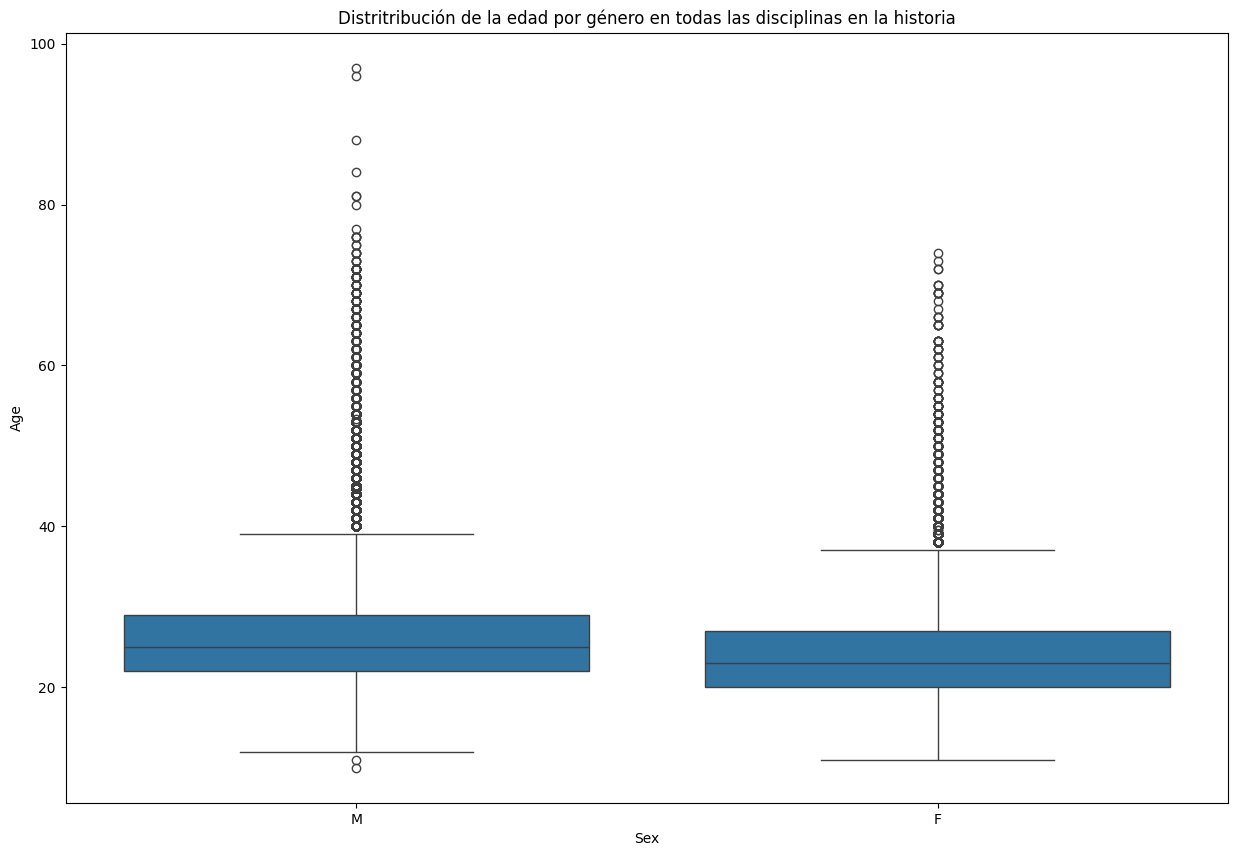

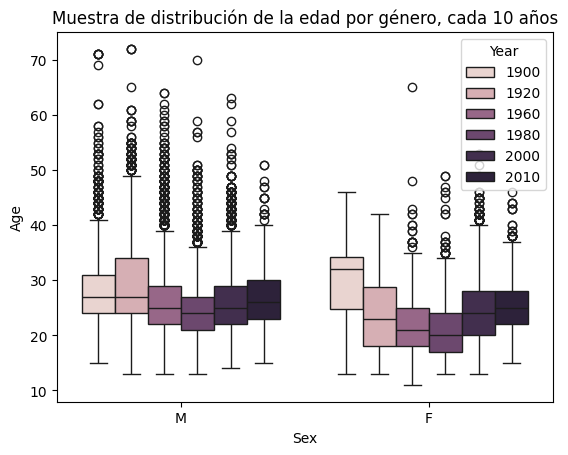

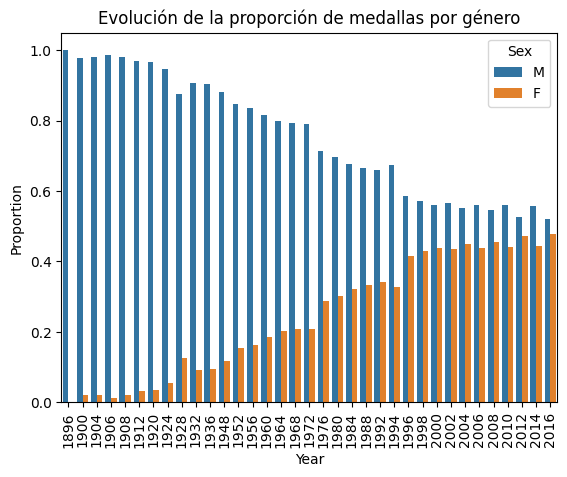

In [15]:
#Creo gráficos de caja para estudiar las edades por género
plt.figure(figsize=(15,10))
sns.boxplot(x='Sex', y='Age', data=ath)
plt.title('Distritribución de la edad por género en todas las disciplinas en la historia')
plt.show()

#Gráficos de caja de edad por género y por año (cada 10 años). Es una muestra cada 10 años, no la suma acumulada cada 10 años.
sns.boxplot(x='Sex', y='Age', hue='Year', data=ath[ath['Year']%10==0]) #La variable hue es para avisar que quiero agrupar las cajas por la variable Year
plt.title('Muestra de distribución de la edad por género, cada 10 años')
plt.show()

#Gráfico de barras para la proporción de medallas por género y año
ath_medallas=ath[ath['Medal']!='No'].groupby(['Year','Sex']).size()
#print(ath_medallas, '\n') #Para ver como funciona el reset_index, el antes y después
ath_medallas=ath_medallas.reset_index(name='Count')
# print(ath_medallas, '\n') #Para ver como funciona el reset_index, el antes y después
ath_medallas['Proportion']=ath_medallas.groupby('Year')['Count'].transform(lambda x:x/x.sum())
sns.barplot(x='Year', y='Proportion', hue='Sex', data=ath_medallas)
plt.title('Evolución de la proporción de medallas por género')
plt.xticks(rotation=90)
plt.show()


Llama la atención aquellos atletas de son menores de edad y los que superan los 50 años, pues al final es una competencia de atletas seleccionados por sus destrezas físicas.

Se construye un dataframe para investigar estos valores.

In [16]:
#Construyo dataframe con los atletas menores de 18 años y mayores de 50 años
outliers_edad = pd.DataFrame(ath[(ath['Age']<18) | (ath['Age']>50)])
outliers_edad.sort_values(by='Age')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142104,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
250969,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,No
93512,47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.0,45.0,Norway,NOR,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,No
43254,22411,Magdalena Cecilia Colledge,F,11.0,152.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,No
102325,52070,Etsuko Inada,F,11.0,NaN,NaN,Japan,JPN,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Figure Skating,Figure Skating Women's Singles,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235699,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,No
9355,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No
60519,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No
97546,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No


In [17]:
#Cantidad de elementos
outliers_edad.shape[0]

13981

Obtengo 14447 en 271116 atletas que cumplen con la condición aplicada.
Ahora obtengo una serie con las disciplinas de estos atletas.

In [18]:
outliers_disciplina = outliers_edad['Sport'].unique()
outliers_disciplina

array(['Art Competitions', 'Luge', 'Shooting', 'Athletics',
       'Figure Skating', 'Synchronized Swimming', 'Fencing', 'Swimming',
       'Weightlifting', 'Diving', 'Rowing', 'Alpine Skiing',
       'Freestyle Skiing', 'Rhythmic Gymnastics', 'Gymnastics',
       'Volleyball', 'Football', 'Modern Pentathlon', 'Boxing',
       'Table Tennis', 'Ski Jumping', 'Wrestling', 'Judo', 'Cycling',
       'Archery', 'Taekwondo', 'Speed Skating', 'Ice Hockey',
       'Cross Country Skiing', 'Equestrianism', 'Sailing', 'Canoeing',
       'Short Track Speed Skating', 'Tennis', 'Badminton', 'Basketball',
       'Hockey', 'Croquet', 'Snowboarding', 'Golf', 'Handball',
       'Nordic Combined', 'Alpinism', 'Water Polo', 'Roque', 'Skeleton',
       'Biathlon', 'Bobsleigh', 'Curling', 'Motorboating', 'Softball',
       'Lacrosse', 'Polo', 'Baseball', 'Tug-Of-War'], dtype=object)

Obtengo el listado de deportes que explica el rango de edades que podrían tener los atletas.

Realizado el estudio de outliers y respaldado con información de internet, se concluye que los outliers expuestos tienen una probabilidad muy alta de ser verídicos, y no se expone ningún dato poco probable pasible de eliminación/modificación que interfiera con el estudio de este proyecto.

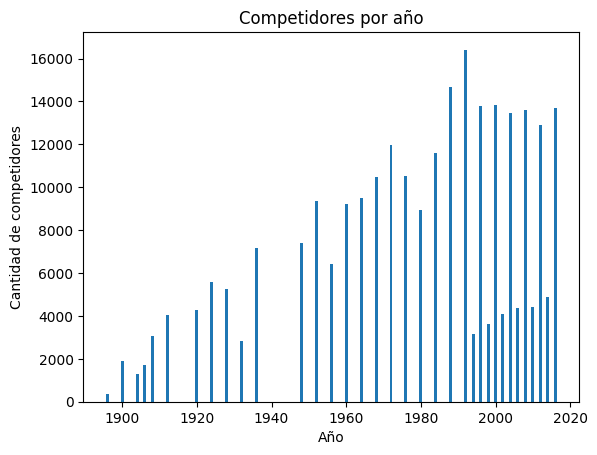

In [19]:
# Vamos a hacer un gráfico de barras de cantidad de competidores por año

atletasXaño = pd.DataFrame(ath['Year'].value_counts())

# Obtengo la serie de años que se hicieron Juegos Olímpicos
oli_año = atletasXaño.index

# Obtengo la suma de atletas que participaron en cada juego olímpico por año
oli_atletas = atletasXaño['count']

fig, ax = plt.subplots()
# vamos a hacer un gráfico de barras de cantidad de competidores por año

ax.bar(oli_año,oli_atletas)
ax.set_title('Competidores por año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de competidores')
plt.show()

Cabe destacar que los juegos olímpicos de verano y de invierno se realizaron juntos hasta 1992. El primer juego olímpico de invierno que se realizó por separado fue en 1994 y se destaca en la concentración de columnas en los últimos tiempos. **No se debe asumir que los juegos de verano e invierno fueron siempre por separado**
De tal forma, se procede a unificar los juegos de verano e invierno a partir de 1994 para su posterior análisis.

Además, se perciben dos espacios que se corresponden a la suspensión del mismo debido a las guerras mundiales.

In [20]:
# Se crea una nueva columna de nombre "periodo" para usar esta como referencia. Se crea una función para crear la nueva columna:

def nuevoPeriodo(ath):
    if ath['Year'] < 1994:
        return ath['Year']
    elif ath['Year'] in [1994, 1996]:
        return 1996
    elif ath['Year'] in [1998, 2000]:
        return 2000
    elif ath['Year'] in [2002, 2004]:
        return 2004
    elif ath['Year'] in [2006, 2008]:
        return 2008
    elif ath['Year'] in [2010, 2012]:
        return 2012
    elif ath['Year'] in [2014, 2016]:
        return 2016
    elif ath['Year'] in [2018, 2020]:
        return 2020
    else:
        return None

# Aplico la función para crear la nueva columna 'Periodo'
ath['Period'] = ath.apply(nuevoPeriodo, axis=1)

# Verifico
print(ath[['Year', 'Season', 'Period']].drop_duplicates().sort_values(by='Year'))


      Year  Season  Period
3078  1896  Summer    1896
3     1900  Summer    1900
711   1904  Summer    1904
268   1906  Summer    1906
1149  1908  Summer    1908
35    1912  Summer    1912
2     1920  Summer    1920
672   1924  Winter    1924
39    1924  Summer    1924
935   1928  Winter    1928
133   1928  Summer    1928
1325  1932  Winter    1932
26    1932  Summer    1932
94    1936  Summer    1936
1326  1936  Winter    1936
41    1948  Summer    1948
1187  1948  Winter    1948
110   1952  Winter    1952
29    1952  Summer    1952
111   1956  Winter    1956
128   1956  Summer    1956
83    1960  Winter    1960
129   1960  Summer    1960
85    1964  Winter    1964
192   1964  Summer    1964
89    1968  Summer    1968
266   1968  Winter    1968
626   1972  Winter    1972
90    1972  Summer    1972
145   1976  Summer    1976
628   1976  Winter    1976
188   1980  Summer    1980
30    1980  Winter    1980
88    1984  Summer    1984
87    1984  Winter    1984
4     1988  Winter    1988
9

##Crear visualizaciones para las variables seleccionadas

##Visualización 1: Proporción de medallistas femeninas a lo largo del tiempo
Se ilustra la evolución de la proporción de medallistas femeninas a lo largo de la historia de los juegos olímpicos

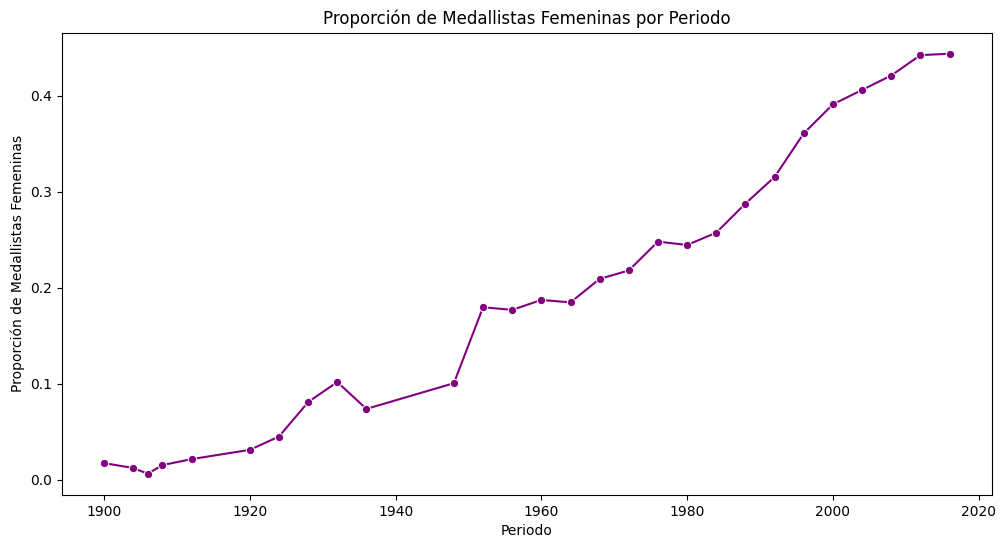

In [21]:
# Filtro a los atletas con medallas
medallero = ath[ath['Medal'].notna()]

# Calcular proporción de medallistas femeninas por periodo
fem_medallero = medallero[medallero['Sex'] == 'F']
proporcion_fem_medalleroXperiodo = fem_medallero.groupby('Period')['ID'].count() / medallero.groupby('Period')['ID'].count()
proporcion_fem_medalleroXperiodo = proporcion_fem_medalleroXperiodo.reset_index().rename(columns={0: 'Proportion'})

# Crear visualización de la proporción de medallistas femeninas por periodo
plt.figure(figsize=(12, 6))
sns.lineplot(data=proporcion_fem_medalleroXperiodo, x='Period', y='ID', marker='o', color='purple')
plt.title('Proporción de Medallistas Femeninas por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Proporción de Medallistas Femeninas')
plt.show()

La proporción de medallistas femeninas ha aumentado notablemente a lo largo del tiempo. Este aumento refleja los esfuerzos para promover la igualdad de género en los deportes, junto con un incremento en la participación de mujeres en los Juegos Olímpicos. La visualización muestra que, aunque hubo periodos con proporciones más bajas, la tendencia general es positiva hacia una mayor representación femenina.

Este aumento puede explicarse con los siguientes motivos:

  1. **Incremento en la Participación Femenina:** Expansión de deportes para mujeres y políticas de igualdad de género
  2. **Cambio en las Normas Sociales:** Evolución de los Roles de Género y el apoyo Institucional.
  3. **Desarrollo y Profesionalización del Deporte Femenino:** Acceso a Recursos y visibilidad y popularidad:

##Visualización 2: Número total de medallistas por sexo y por periodo
Se ilustra el crecimiento de las medallistas femeninas en comparación a los masculinos. Se nota que sigue habiendo disciplinas solo masculinas.

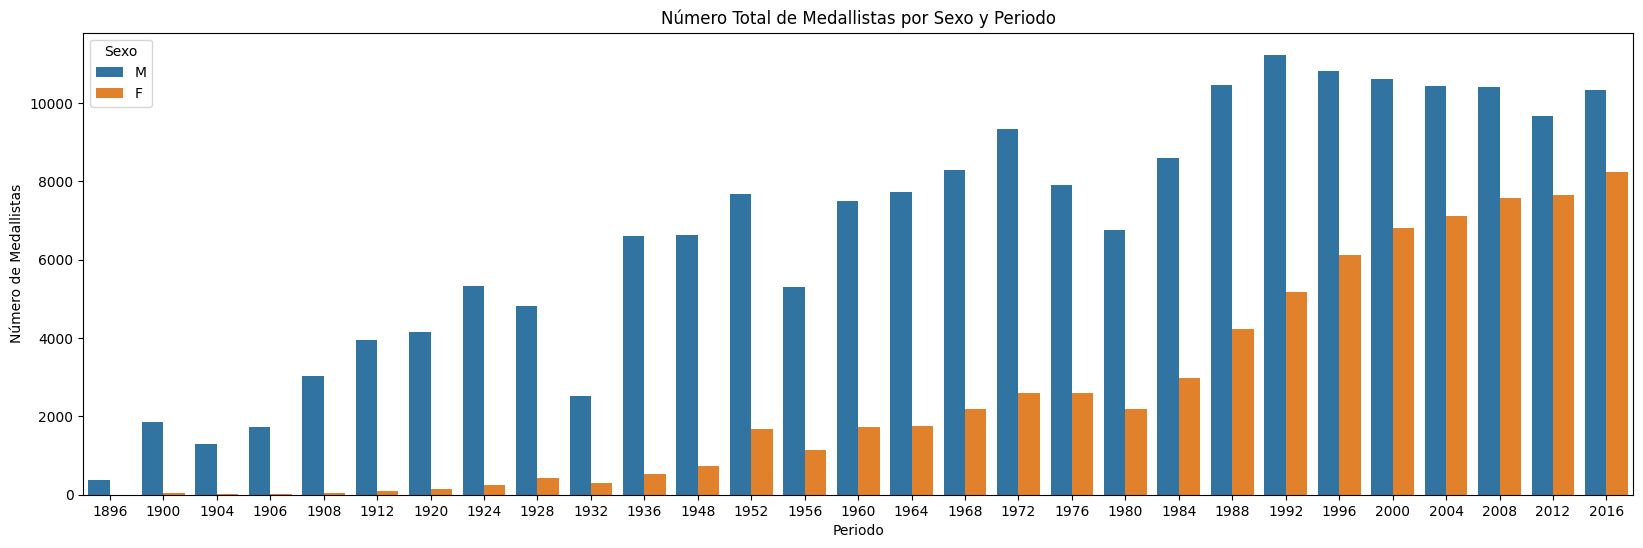

In [22]:
# Contar el número total de medallistas por sexo y periodo
medallistasXsexoXperiodo = medallero.groupby(['Period', 'Sex'])['ID'].count().reset_index()

# Crear visualización del número total de medallistas por sexo y periodo
plt.figure(figsize=(20, 6))
sns.barplot(data=medallistasXsexoXperiodo, x='Period', y='ID', hue='Sex')
plt.title('Número Total de Medallistas por Sexo y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Número de Medallistas')
plt.legend(title='Sexo')
plt.show()

La visualización del número total de medallistas por sexo y periodo muestra un aumento constante en el número de medallistas femeninas en comparación con los medallistas masculinos. Aunque los hombres todavía constituyen una mayoría en algunos periodos, la brecha se ha ido reduciendo con el tiempo. Esto sugiere que las oportunidades para las mujeres en el deporte olímpico han mejorado, lo que ha llevado a una mayor presencia y éxito de las mujeres en los Juegos Olímpicos.

##Visualización 3: Proporción de medallistas femeninas por deporte y por temporada

<Figure size 1200x600 with 0 Axes>

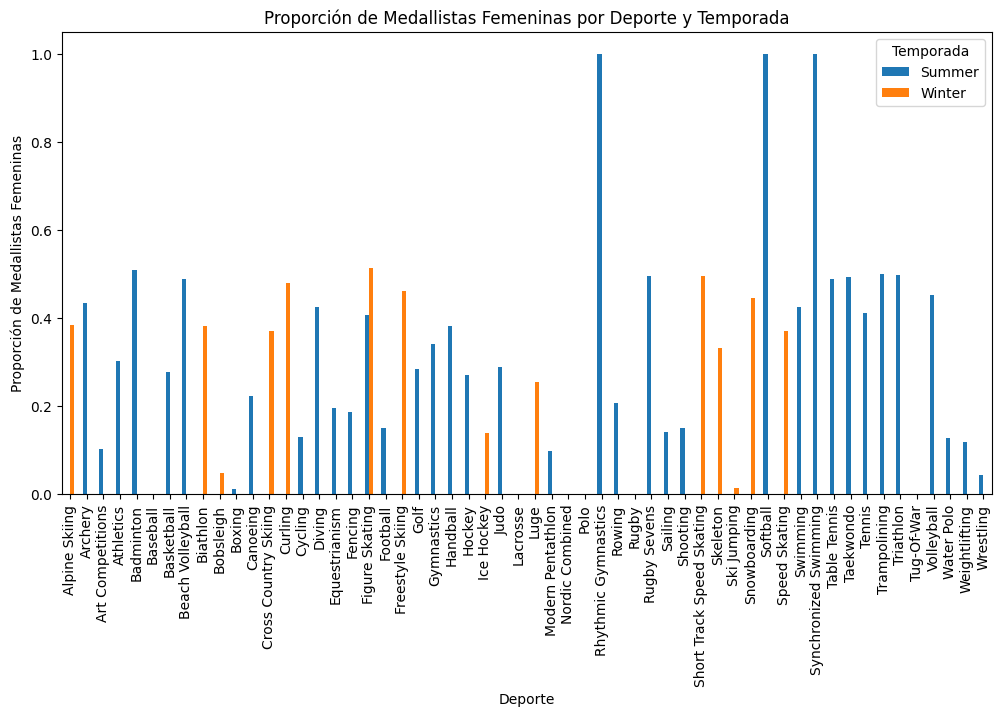

In [23]:
# Calcular proporción de medallistas femeninas por deporte y temporada
prop_fem_XdeporteYtemp = fem_medallero.groupby(['Sport', 'Season'])['ID'].count() / medallero.groupby(['Sport', 'Season'])['ID'].count()

# Filtrar para eliminar deportes con pocos datos
prop_fem_XdeporteYtemp = prop_fem_XdeporteYtemp[medallero.groupby(['Sport', 'Season'])['ID'].count() > 30]

# Crear visualización de la proporción de medallistas femeninas por deporte y temporada
plt.figure(figsize=(12, 6))
prop_fem_XdeporteYtemp.unstack().plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proporción de Medallistas Femeninas por Deporte y Temporada')
plt.xlabel('Deporte')
plt.ylabel('Proporción de Medallistas Femeninas')
plt.legend(title='Temporada')
plt.show()

En la visualización previa se muestra cómo la proporción de medallistas femeninas varía entre diferentes deportes y temporadas.

Se consideran las disciplinas con más de 30 datos, para ilustrar la variedad que hay en todo el dataset.

La proporción de medallistas femeninas varía significativamente entre diferentes deportes y temporadas. Algunos deportes tienen una alta proporción de medallistas femeninas, mientras que otros tienen una participación femenina más baja. La visualización indica que la inclusión y el éxito de las mujeres en ciertos deportes han sido más prominentes en algunas disciplinas, lo que puede ser un reflejo de la evolución de estos deportes y las oportunidades disponibles para las atletas femeninas. Esta diversidad en la proporción sugiere áreas donde se pueden realizar más esfuerzos para promover la participación femenina.

##Conclusión primera parte
El análisis de las visualizaciones nos permite concluir que la proporción de medallistas femeninas ha cambiado significativamente a lo largo del tiempo. Esto refleja los cambios en las políticas de igualdad de género, la evolución de las normas sociales y el mayor apoyo institucional para las atletas femeninas. Las visualizaciones proporcionan una comprensión clara de cómo y dónde se han producido estos cambios, destacando el progreso realizado y las áreas que aún necesitan atención.

#SEGUNDA PARTE: Entrega final - Machine Learning
Para profundizar el estudio de la hipótesis **"La proporción de medallistas femeninas ha cambiado significativamente a lo largo del tiempo"** utilizando modelos de Machine Learning, se pueden aplicar varios enfoques. Se explora el modelado por Regresión Logística, XBoost y Random Forest

**Objetivo:** Evaluar cómo las variables independientes, como el año, el deporte, la temporada, y el país (NOC), afectan la probabilidad de que un atleta sea una medallista femenina.

Se construye un modelo donde la variable dependiente sea binaria (0 para masculino y 1 para femenino). Estos modelos permitirían entender qué factores están más asociados con la probabilidad de que una medalla sea ganada por una mujer.

Este modelo nos permite cuantificar y evaluar cómo la variable de interés (el sexo del medallista) se ve influenciada por variables como el tiempo (año), el tipo de evento (deporte, disciplina) y la temporada (verano o invierno).

Creo un modelo de prueba y otro de entrenamiento. El de prueba será un 30% de los datos.


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Columna binaria de la variable 'Sex' para la variable objetivo
ath['IsFemale'] = ath['Sex'].apply(lambda x: 1 if x == 'F' else 0)

# Variables independientes (predictoras)
X = ath[['Year', 'Sport', 'Season']]

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X, drop_first=True)

# Definir la variable dependiente (objetivo)
y = ath['IsFemale']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Los 3 modelos a elegir son: Regresión Lineal, Random Forest y XGBoost.

La idea es comparar los 3 modelos para ver cuál obtiene mejor resultado para predicción

In [25]:
# Definir modelos y parámetros para GridSearch
models = {
    'LinearRegression': (LinearRegression(), {}),
    'RandomForest': (RandomForestRegressor(), {'n_estimators': [20, 100, 200]}),
    'XGBoost': (XGBRegressor(), {'n_estimators': [20, 100, 200], 'max_depth': [5, 7, 9]})
}

Creo diccionarios de resultados y valores de MSE, para comparar y evaluar sobre el mejor.

Una métrica común para comparar modelos de regresión es el Error Cuadrático Medio (MSE), ya que mide qué tan lejos están las predicciones de los valores reales. Penaliza los grandes errores. Nota: GridSearchCV devuelve el negativo del MSE, por lo que valores más cercanos a 0 son mejores.

En los resultados guardo los hiperparámetros y en el MSE el score MSE que es un coeficiente sobre el que voy a decidir cual modelo es mejor. El MSE más chico indica un modelo de predicción más justo.

In [26]:
# Diccionario para almacenar resultados
results = {}
mse_scores = {}

# GridSearchCV para cada modelo
for name, (model, params) in models.items():
    grid = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=3)
    grid.fit(X_train, y_train)
    results[name] = grid.best_params_
    mse_scores[name] = -grid.best_score_  # Convertir a MSE positivo

In [27]:
results

{'LinearRegression': {},
 'RandomForest': {'n_estimators': 200},
 'XGBoost': {'max_depth': 5, 'n_estimators': 200}}

In [28]:
mse_scores

{'LinearRegression': 0.1670395897969632,
 'RandomForest': 0.1612003633195588,
 'XGBoost': 0.16105424139758706}

Con los resultados guardados en ambos diccionarios imprimo los valores

In [29]:
# Imprimir los mejores parámetros y MSE para cada modelo
print("Resultados:")
for model, params in results.items():
    print(f"{model}: Best Params: {params}, Best MSE: {mse_scores[model]}")

Resultados:
LinearRegression: Best Params: {}, Best MSE: 0.1670395897969632
RandomForest: Best Params: {'n_estimators': 200}, Best MSE: 0.1612003633195588
XGBoost: Best Params: {'max_depth': 5, 'n_estimators': 200}, Best MSE: 0.16105424139758706


Elijo el mejor modelo por el que tiene menor MSE

In [30]:
# Seleccionar el mejor modelo (menor MSE)
best_model_name = min(mse_scores, key=mse_scores.get)
print(f"Best Model: {best_model_name}, MSE: {mse_scores[best_model_name]}")

Best Model: XGBoost, MSE: 0.16105424139758706


Evalúo en XGBoost con los mejores parámetros

In [31]:
# Usar el mejor modelo con sus mejores parámetros
best_model = GridSearchCV(
    estimator=models[best_model_name][0],
    param_grid=models[best_model_name][1],
    scoring='neg_mean_squared_error',
    cv=3
)
best_model.fit(X_train, y_train)
predictions = best_model.best_estimator_.predict(X_test)

# Calcular y mostrar el MSE final en el conjunto de prueba
final_mse = mean_squared_error(y_test, predictions)
print(f"Final Test MSE: {final_mse}")

Final Test MSE: 0.16063392682536404


¿Por qué es mejor?
El modelo ahora entrena con todo el conjunto de entrenamiento (X_train), lo que incluye más datos que los usados en los folds de validación cruzada.
Entrenar con más datos mejora el ajuste del modelo, lo que reduce el error al evaluar en el conjunto de prueba.

##Modelado 1: Regresión Logística

In [55]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Entrenamiento del modelo

In [56]:
# Crear el modelo de regresión logística
model1 = LogisticRegression(max_iter=100000)

# Entrenar el modelo con los datos de entrenamiento
model1.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

Predicciones

In [57]:
# Predicciones en el conjunto de prueba
y_pred = model1.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred, zero_division=0))

# Calculate MSE
mse1 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse1}")

Matriz de confusión:
 [[35310  3761]
 [11110  3766]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83     39071
           1       0.50      0.25      0.34     14876

    accuracy                           0.72     53947
   macro avg       0.63      0.58      0.58     53947
weighted avg       0.69      0.72      0.69     53947

Mean Squared Error: 0.275659443527907


El modelo tiene un buen desempeño en clasificar hombres (clase mayoritaria), con alto recall (90%) y precisión (76%).

El desempeño para mujeres es bajo, con recall (25%) y F1-score (33%), indicando que no está capturando correctamente muchas mujeres medallistas (alto FN).

El desbalance de clases está afectando el desempeño, por lo que es clave ajustar el modelo o balancear las clases para mejorar las predicciones en mujeres.

Se sugiere rebalancear las clases con el uso de SMOTE (Synthetic Minority Over-sampling Technique).

Es una técnica utilizada para abordar el problema del desequilibrio de clases en conjuntos de datos. Cuando un conjunto de datos tiene una distribución de clases desigual, es decir, una clase es mucho más frecuente que otra, los modelos de aprendizaje automático tienden a estar sesgados hacia la clase mayoritaria, lo que puede llevar a un mal rendimiento en la clasificación de la clase minoritaria.

MSE 0.2757: Este valor indica que el modelo tiene errores considerables, especialmente para la clase minoritaria (1).

Se importan las librerías necesarias para aplicar la mejora del SMOTE

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

Si bien no fue un tema abarcado en el curso, se ejecuta la función SMOTE para rebalancear las clases. Resulta interesante cómo mejoran las métricas que se comentan después tras aplicar este método. Solo se hará para este modelo a modo de ejemplo.

In [59]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

Se realizan los mismos pasos que antes con las nuevas muestras

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, shuffle=True)

In [61]:
# Predicciones en el conjunto de prueba
y_pred = model1.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))

# Calculate MSE
mse2 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse2}")

Matriz de confusión:
 [[53166  5643]
 [43575 14828]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.55      0.90      0.68     58809
           1       0.72      0.25      0.38     58403

    accuracy                           0.58    117212
   macro avg       0.64      0.58      0.53    117212
weighted avg       0.64      0.58      0.53    117212

Mean Squared Error: 0.41990581169163566


Interpretación de resultados:
Mejor balance en precisión para mujeres:
Tras usar SMOTE, el modelo identifica mejor a las mujeres (mayor precision, ahora 0.72). Esto significa que predice mujeres con mayor confianza.

Problemas con recall para mujeres:
Sin embargo, el modelo sigue teniendo dificultades para identificar correctamente a todas las mujeres reales, con un recall de solo 0.25.

Aumento de falsos negativos:
El modelo clasifica erróneamente a muchas mujeres como hombres (FN = 43,677), lo que indica un problema en la diferenciación de las clases.

Trade-off precisión vs recall:
SMOTE ayudó a mejorar la precisión de mujeres, pero afectó el recall y el balance general.

MSE 0.4199: Aumentó, lo cual refleja mayor cantidad de errores globales debido al enfoque en la clase minoritaria.

A modo ilustrativo, generamos una visualización de la matriz de confusión

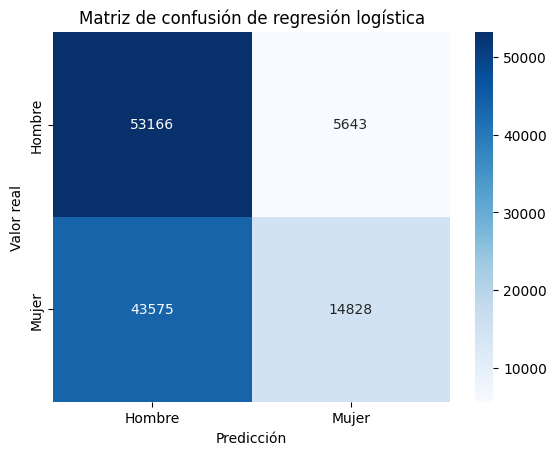

In [62]:
# Creamos la matriz de confusion
confusion = confusion_matrix(y_test, y_pred)

# Crear el heatmap
mat = sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')

# Ajustar las etiquetas del eje x e y
mat.set(title='Matriz de confusión de regresión logística', ylabel ='Valor real', xlabel='Predicción')
mat.set_xticklabels(['Hombre', 'Mujer'])
mat.set_yticklabels(['Hombre', 'Mujer'])

plt.show()

**Conclusión: El modelo es inadecuado**

Aunque el modelo ha mejorado en algunos aspectos tras aplicar SMOTE, los resultados siguen siendo deficientes, especialmente en términos de recall y f1-score para la clase minoritaria (mujeres). Aquí están los puntos clave que demuestran por qué el modelo no es adecuado:

1. Bajo Recall para Mujeres (Clase 1):
Recall para mujeres: 0.25
Esto significa que solo el 25% de las mujeres reales fueron correctamente identificadas por el modelo.
Este es un índice de fallos significativo, ya que muchas mujeres medallistas no son reconocidas correctamente como tal, lo que hace que el modelo sea ineficaz para predecir correctamente a este grupo.

2. F1-Score bajo para Mujeres:
F1-Score para mujeres: 0.37
El F1-score es una métrica que equilibra precisión y recall. Un F1-score de 0.37 para las mujeres indica que el modelo no está equilibrando bien las dos métricas, lo que refleja un desempeño global pobre en la predicción de mujeres.

3. Desbalance entre Precisión y Recall:
Precisión para mujeres: 0.72, lo que indica que cuando el modelo predice que una persona es mujer, hay una probabilidad razonablemente alta de que lo sea. Sin embargo, esta alta precisión no compensa el hecho de que muchas mujeres son clasificadas erróneamente como hombres (con 43,677 False Negatives), lo que reduce drásticamente el rendimiento general para este grupo.
El alto valor de precisión para mujeres viene a costa de un bajo recall, que es una señal de que el modelo está siendo conservador y no está prediciendo suficientes casos positivos (mujeres).

4. Accuracy General Baja:
Accuracy global: 58%
Esto significa que el modelo solo está acertando en 58% de los casos. Aunque la exactitud es un indicador común, en problemas con clases desbalanceadas (como este, donde hay más hombres que mujeres), la precisión global no es siempre indicativa del buen desempeño del modelo, ya que el modelo puede simplemente predecir la clase mayoritaria (hombres) correctamente la mayoría de las veces.

5. Falta de Mejora en el Desempeño tras SMOTE:
Aunque SMOTE se utilizó para balancear las clases, la mejora en precisión para la clase minoritaria (mujeres) no es suficiente para compensar el mal desempeño en el recall. El modelo sigue fallando en identificar a una parte significativa de las mujeres, lo cual es crítico en un contexto en el que las mujeres medallistas son el foco principal de predicción.

**Conclusión final:**

El modelo no es satisfactorio para la tarea de predecir correctamente a las mujeres medallistas debido al bajo recall y al bajo F1-score para esta clase. A pesar de haber aplicado SMOTE, el modelo todavía tiene una tasa de falsos negativos muy alta para mujeres, lo que hace que no sea útil para predecir este grupo de manera efectiva.

Para mejorar el modelo, sería necesario:

Probar otros modelos más complejos (por ejemplo, Random Forest o XGBoost).
Ajustar el umbral de clasificación.
Probar técnicas adicionales de balanceo de clases o usar métricas de evaluación que prioricen el recall de la clase minoritaria.

## Modelado 2: Gradient Boosting

Instalo XBoost e importo bibliotecas

In [70]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [73]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss',max_depth=5, n_estimators=200)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [74]:
# Hacer predicciones
y_pred = xgb_model.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))

# Calculate MSE
mse3 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse3}")

Matriz de confusión:
 [[56970  1636]
 [20289  2025]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.97      0.84     58606
           1       0.55      0.09      0.16     22314

    accuracy                           0.73     80920
   macro avg       0.65      0.53      0.50     80920
weighted avg       0.69      0.73      0.65     80920

Mean Squared Error: 0.27094661393969355


In [75]:
from sklearn.metrics import accuracy_score as acc
acc(y_pred,y_test)

0.7290533860603065

##Modelado 3: Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))

# Calculate MSE
mse4 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse4}")

Matriz de confusión:
 [[56650  1956]
 [19990  2324]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.97      0.84     58606
           1       0.54      0.10      0.17     22314

    accuracy                           0.73     80920
   macro avg       0.64      0.54      0.51     80920
weighted avg       0.69      0.73      0.65     80920

Mean Squared Error: 0.2712061295106278


In [78]:
acc(y_pred,y_test)

0.7287938704893722

**Conclusión Final sobre el Desempeño de los Modelos**

Tras evaluar los modelos de Regresión Logística (mejorada con SMOTE), XGBoost y Random Forest, y realizar un GridSearch que confirmó a XGBoost como el mejor modelo, se concluye que, aunque XGBoost es superior, su desempeño aún es insuficiente para predecir de manera efectiva a la clase minoritaria (mujeres).

**Resultados clave:**

- **XGBoost (Mejor Modelo según GridSearch):** Destacó en precisión para mujeres (55%) y mostró el mejor balance global según el GridSearch. Sin embargo, su recall (9%) y F1-score (0.16) evidencian una limitada capacidad para identificar mujeres correctamente.
- **Regresión Logística (con SMOTE):** Aunque más simple, logró un mejor recall para mujeres (25%), mostrando un desempeño más equilibrado en términos de identificación de esta clase.
- **Random Forest:** Su desempeño fue similar al de XGBoost, pero no logró superar significativamente a los otros modelos en métricas clave.

**Problema Persistente:**

Todos los modelos enfrentan el mismo desafío: bajo recall y F1-score para mujeres, con un claro sesgo hacia la clase mayoritaria (hombres).

**Conclusión:**

Aunque el GridSearch identificó a XGBoost como el mejor modelo, sus métricas para la clase minoritaria no son satisfactorias. Se necesita un enfoque más robusto para mejorar el rendimiento en la identificación de mujeres, especialmente si este grupo es el foco principal de análisis.

**Reflexión Final**

Este análisis nos muestra lo complicado que es predecir en contextos donde las clases están desequilibradas, especialmente cuando hablamos de cambios históricos como la evolución de la participación femenina en los Juegos Olímpicos. Usar técnicas avanzadas y probar diferentes modelos puede ser clave para obtener una visión más clara y precisa de cómo estos cambios se han desarrollado a lo largo del tiempo.